## 2.5 期待リターンとリスクを計算する

### コード2.21 全銘柄のリターンの期待値とリスクの計算

In [1]:
import pandas as pd

# 日次株価データを読み込み
stockDaily = pd.read_csv('./data/stockDaily.csv', parse_dates=['date'])
stockDaily['date'] = stockDaily['date'].dt.to_period('D')

# リターン列のみ切り出し、各種統計量を求める。
ret = stockDaily['return']
print('ret.mean()', ret.mean())
print('ret.std()', ret.std())
print(ret.describe())
## ret.mean() 0.04066551289344907
## ret.std() 2.9304869696004885
## count    1.200600e+07
## mean     4.066551e-02
## std      2.930487e+00
## min     -9.851632e+01
## 25%     -1.084599e+00
## 50%      0.000000e+00
## 75%      9.900990e-01
## max      5.833333e+02

ret.mean() 0.04066551289344907
ret.std() 2.9304869696004885
count    1.200600e+07
mean     4.066551e-02
std      2.930487e+00
min     -9.851632e+01
25%     -1.084599e+00
50%      0.000000e+00
75%      9.900990e-01
max      5.833333e+02
Name: return, dtype: float64


### コード2.22 ヒストグラムの描画

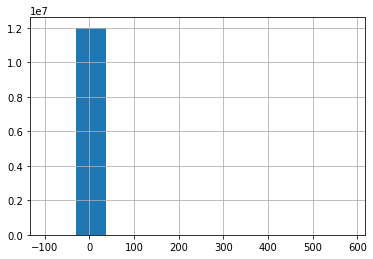

In [2]:
ax = ret.hist()

### コード2.23 ±10%内のリターンを選択して確率分布を描画

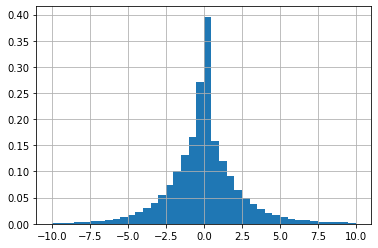

In [3]:
ret10 = ret[(ret >= -10) & (ret <= 10)]
ax = ret10.hist(bins=40, density=True)

### コード2.24 9つの銘柄 (A0001~A0009) の日別リターン行列を作成する

In [4]:
sel = stockDaily[(stockDaily['ticker'] >= 'A0001')
                 & (stockDaily['ticker'] <= 'A0009')]
sel = sel[(sel['return'] >= -10) & (sel['return'] <= 10)]
sel = sel[['date', 'ticker', 'return']]
matrix = sel.pivot(index='date', columns='ticker', values='return')
print(matrix)

ticker         A0001     A0002     A0003     A0004     A0005     A0006  \
date                                                                     
1991-01-04 -0.884354       NaN       NaN -1.454469  1.036269  0.820882   
1991-01-07 -0.068634       NaN       NaN -1.989305 -0.128205  0.027445   
1991-01-08 -1.030220       NaN       NaN  3.601048  1.604621  0.795683   
1991-01-09 -0.277585       NaN       NaN -2.211923 -2.147821 -1.787497   
1991-01-10 -0.904663       NaN       NaN -0.603188 -1.678502 -2.697709   
...              ...       ...       ...       ...       ...       ...   
2014-12-24  0.000000  4.716383 -0.939177  5.269321  0.743494 -3.263889   
2014-12-25  1.142473 -0.272356 -1.083521 -1.001112 -0.295203 -0.547380   
2014-12-26  1.860465  0.419764  1.095390  0.449438  0.740193  0.378959   
2014-12-29 -3.457273 -0.946817 -4.108352  0.782998 -2.057311 -0.359551   
2014-12-30  4.662162  0.564369  0.423729  1.109878  2.625656  2.183130   

ticker         A0007     A0008     A0

### コード2.25  9つの銘柄の期待リターン、リスク、そして確率分布

ticker
A0001    0.022280
A0002    0.034349
A0003    0.000798
A0004   -0.071720
A0005   -0.010680
A0006    0.017990
A0007   -0.150385
A0008    0.008216
A0009    0.014154
dtype: float64
ticker
A0001    2.261780
A0002    2.144063
A0003    2.759499
A0004    2.640076
A0005    2.296740
A0006    2.350154
A0007    2.587772
A0008    2.518283
A0009    2.144699
dtype: float64


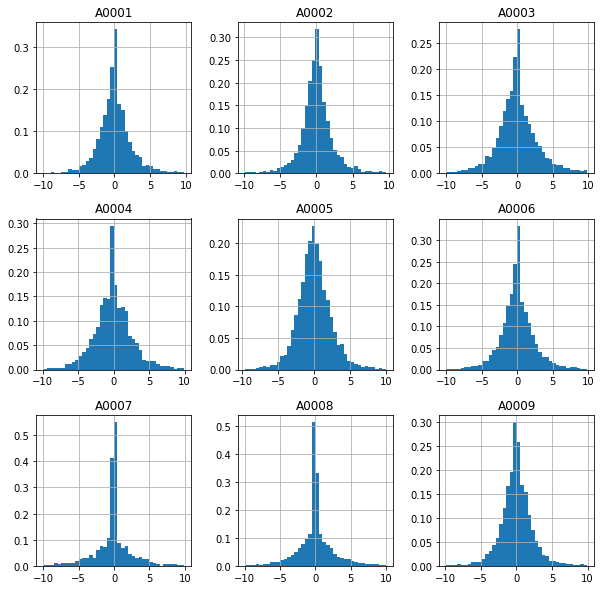

In [5]:
print(matrix.mean()) # 期待リターン
## ticker
## A0001    0.022280
## A0002    0.034349
## A0003    0.000798
## A0004   -0.071720
## A0005   -0.010680
## A0006    0.017990
## A0007   -0.150385
## A0008    0.008216
## A0009    0.014154
## dtype: float64

print(matrix.std()) # リスク
## ticker
## A0001    2.261780
## A0002    2.144063
## A0003    2.759499
## A0004    2.640076
## A0005    2.296740
## A0006    2.350154
## A0007    2.587772
## A0008    2.518283
## A0009    2.144699
## dtype: float64

# ヒストグラムの描画
ax = matrix.hist(bins=40, figsize=(10, 10), density=True)